In [1]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

from fin.sdk.data import *
from fin.sdk.momentum import *
from fin.sdk.backtest import *

In [2]:
df = get_historical_stock_df("1day", ["AAPL","VLKPF"], "2000-01-01", "2023-11-10")

In [3]:
open_ts = df.loc[(slice(None), "AAPL"),:]["open"]
x = open_ts.index.get_level_values("date")
y = open_ts.values

In [4]:
xi = np.arange(open_ts.shape[0])
slope, intercept, r_value, p_value, std_err = stats.linregress(xi,y)

In [5]:
print(slope, intercept, p_value)

0.01597416367673329 -34.67060596356971 0.0


In [6]:
yi = slope*xi+intercept

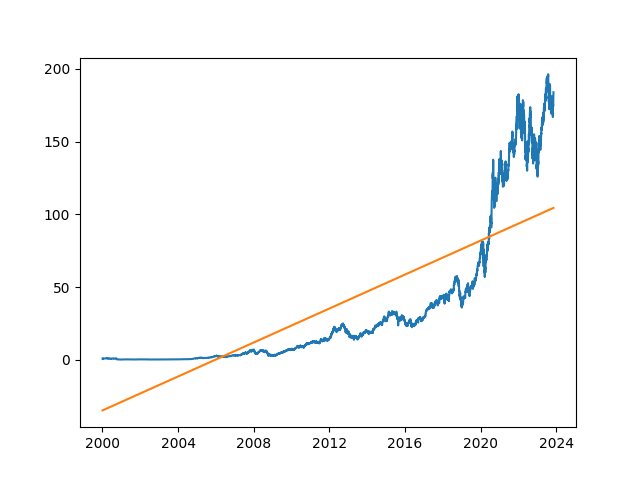

In [7]:
plt.figure()
plt.plot(x,y, x, yi)
plt.show()


In [31]:
window = 15

In [32]:
slopes = np.zeros((open_ts.shape[0],))
p_values = np.zeros((open_ts.shape[0],))
significant_slopes = np.zeros((open_ts.shape[0],))
for i in range(open_ts.shape[0]-window):
    xi_window = np.arange(window)
    y_window = open_ts.values[i:i+window]
    slope, intercept, r_value, p_value, std_err = stats.linregress(xi_window,y_window)
    slopes[i+window-1] = slope
    p_values[i+window-1] = p_value

In [33]:
pvalue_threshold = 0.0000001
significant_slopes[p_values<pvalue_threshold] = slopes[p_values<pvalue_threshold]

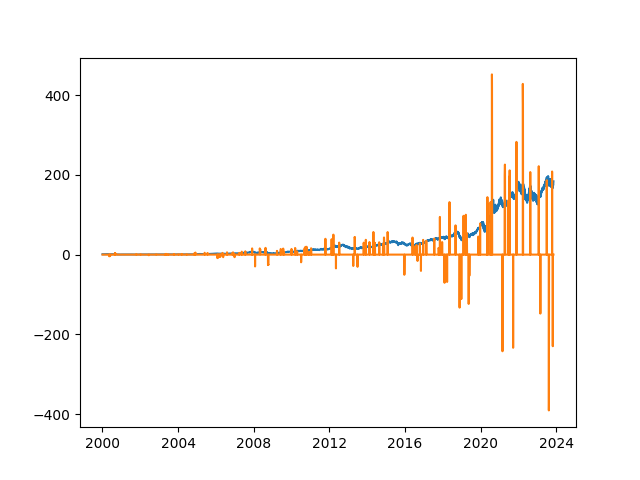

In [34]:
plt.figure()
plt.plot(x, y, x, 250*significant_slopes)
plt.show()